In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("../assets/imori.jpg", 0)
h, w = img.shape
ch, cw = h//2, w//2

In [3]:
# DFT
def DFT(img):
    dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    mag_spec = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
    return dft_shift, mag_spec

In [4]:
# LPF
def LPF(ch, cw, n):
    mask = np.zeros((h, w, 2), np.uint8)
    mask[ch-n : ch+n , cw-n : ch+n] = 1 
    return mask

In [5]:
# HPF
def HPF(ch, cw, n):
    mask = np.ones((h, w, 2), np.uint8)
    mask[ch-n : ch+n , cw-n : ch+n] = 0 
    return mask

In [10]:
# BPF
def BPF(ch, cw, n, m):
    mask1 = np.ones((h, w, 2), np.uint8)
    mask1[ch-n : ch+n , cw-n : ch+n] = 0
    mask2 = np.ones((h, w, 2), np.uint8)
    mask2[ch-m : ch+m , cw-m : ch+m] = 0
    mask = mask1| mask2
    return mask

In [13]:
# IDFT
def IDFT(dft_shift, mask):
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    
    out = cv2.idft(f_ishift)
    out = cv2.magnitude(out[:,:,0], out[:,:,1])
    return out

(<matplotlib.axes._subplots.AxesSubplot at 0x11c3bca50>,
 <matplotlib.image.AxesImage at 0x11c43b350>)

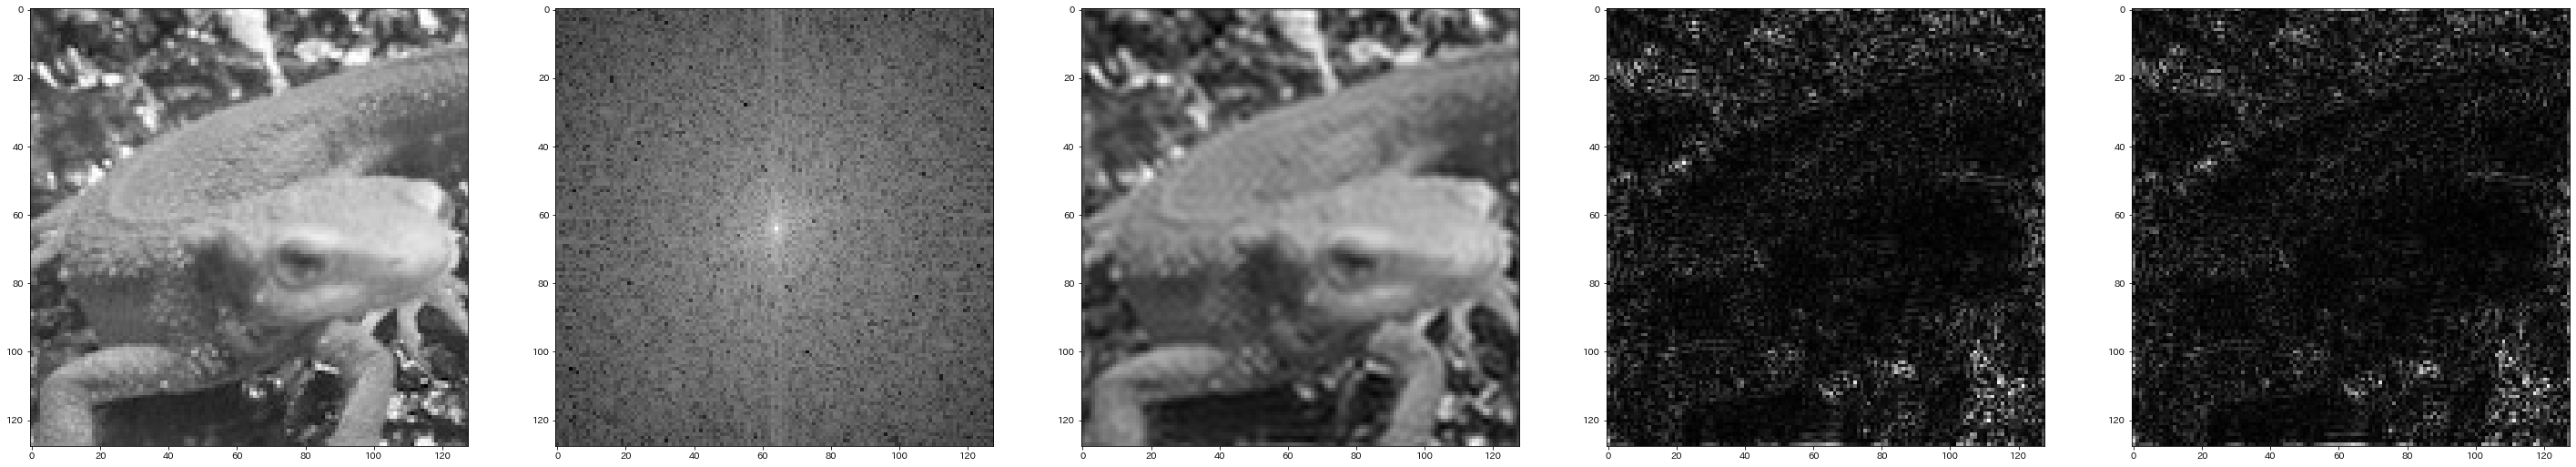

In [14]:
dft, spec = DFT(img)
mask1 = LPF(ch, cw, 30)
mask2 = HPF(ch, cw, 20)
mask3 = BPF(ch, cw, 50, 20)
idft1 = IDFT(dft, mask1)
idft2 = IDFT(dft, mask2)
idft3 = IDFT(dft, mask3)

plt.figure(figsize=(50,50))
plt.subplot(151), plt.imshow(img, cmap="gray")
plt.subplot(152), plt.imshow(spec, cmap="gray")
plt.subplot(153), plt.imshow(idft1, cmap="gray")
plt.subplot(154), plt.imshow(idft2, cmap="gray")
plt.subplot(155), plt.imshow(idft3, cmap="gray")